In [25]:
import numpy as np
from functools import partial

from laws.poisson_law import generate_poisson_law, poisson_probability
from general_stats import perform_chi2_test

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [26]:
N = 300
lamb = 5

(8.687255411226161, 9)


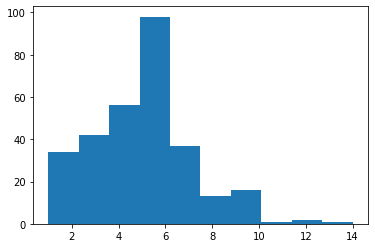

In [27]:
poisson_values = generate_poisson_law(lamb, N)
chi2, empirical_values, expected_values, bins = perform_chi2_test(poisson_values, partial(poisson_probability, lamb))
print(chi2)